In [3]:
# Importing libraries

import pandas as pd
import numpy as np

from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score, classification_report

import matplotlib.pyplot as plt

import nltk
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize

In [4]:
#Downloading nltk resources
nltk.download('punkt')
nltk.download('stopwords')

[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\Trijal\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\Trijal\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


True

In [5]:
#Load dataset
df=pd.read_csv("C:\\Users\\Trijal\\Desktop\\Project_Disease\\Dataset\\Symptom2Disease.csv")

In [6]:
df

,Unnamed: 0,label,text
0,0,Psoriasis,I have been experiencing a skin rash on my arm...
1,1,Psoriasis,"My skin has been peeling, especially on my kne..."
2,2,Psoriasis,I have been experiencing joint pain in my fing...
3,3,Psoriasis,"There is a silver like dusting on my skin, esp..."
4,4,Psoriasis,"My nails have small dents or pits in them, and..."
...,...,...,...
1195,295,diabetes,I'm shaking and trembling all over. I've lost ...
1196,296,diabetes,"Particularly in the crevices of my skin, I hav..."
1197,297,diabetes,I regularly experience these intense urges and...
1198,298,diabetes,"I have trouble breathing, especially outside. ..."


In [7]:
#Removing Unwanted Column
df.drop(columns=["Unnamed: 0"], inplace=True)

In [8]:
df

,label,text
0,Psoriasis,I have been experiencing a skin rash on my arm...
1,Psoriasis,"My skin has been peeling, especially on my kne..."
2,Psoriasis,I have been experiencing joint pain in my fing...
3,Psoriasis,"There is a silver like dusting on my skin, esp..."
4,Psoriasis,"My nails have small dents or pits in them, and..."
...,...,...
1195,diabetes,I'm shaking and trembling all over. I've lost ...
1196,diabetes,"Particularly in the crevices of my skin, I hav..."
1197,diabetes,I regularly experience these intense urges and...
1198,diabetes,"I have trouble breathing, especially outside. ..."


In [9]:
print(df["label"].unique())
print('\n')
print("No.of disease that can be predicted:",len(df["label"].unique()))

['Psoriasis' 'Varicose Veins' 'Typhoid' 'Chicken pox' 'Impetigo' 'Dengue'
 'Fungal infection' 'Common Cold' 'Pneumonia' 'Dimorphic Hemorrhoids'
 'Arthritis' 'Acne' 'Bronchial Asthma' 'Hypertension' 'Migraine'
 'Cervical spondylosis' 'Jaundice' 'Malaria' 'urinary tract infection'
 'allergy' 'gastroesophageal reflux disease' 'drug reaction'
 'peptic ulcer disease' 'diabetes']


No.of disease that can be predicted: 24


Thus the Above Dataset has 1200 Datapoints and we can predict 24 Unique Diseases and Each disease has around 50 symptoms

In [11]:
#Pre-Processing
#Check for NULL
df.isnull().sum()

label    0
text     0
dtype: int64

In [12]:
df["label"].value_counts() # Thus dataset is equally distrubited

label
Psoriasis                          50
Varicose Veins                     50
peptic ulcer disease               50
drug reaction                      50
gastroesophageal reflux disease    50
allergy                            50
urinary tract infection            50
Malaria                            50
Jaundice                           50
Cervical spondylosis               50
Migraine                           50
Hypertension                       50
Bronchial Asthma                   50
Acne                               50
Arthritis                          50
Dimorphic Hemorrhoids              50
Pneumonia                          50
Common Cold                        50
Fungal infection                   50
Dengue                             50
Impetigo                           50
Chicken pox                        50
Typhoid                            50
diabetes                           50
Name: count, dtype: int64

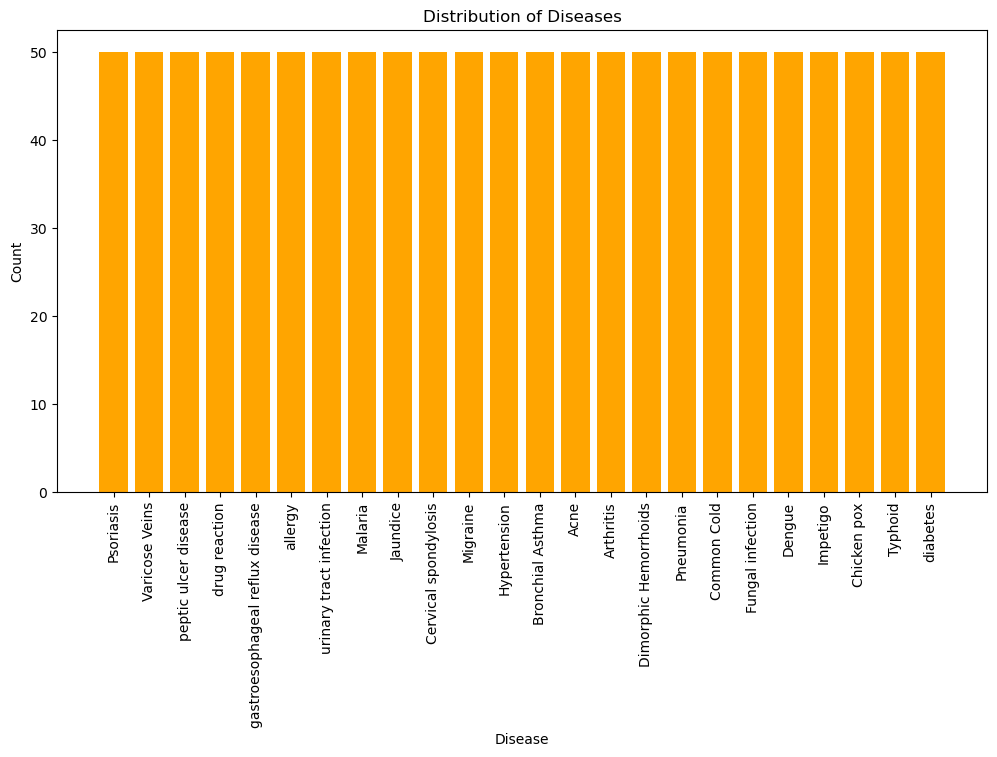

In [13]:
import matplotlib.pyplot as plt

# Count the occurrences of each disease
disease_counts = df['label'].value_counts()

# Plotting a bar chart
plt.figure(figsize=(12, 6))
plt.bar(disease_counts.index, disease_counts.values, color='orange')
plt.xlabel('Disease')
plt.ylabel('Count')
plt.title('Distribution of Diseases')
plt.xticks(rotation=90)
plt.show()

In [14]:
# Extracting 'label' and 'text' columns from the 'data' DataFrame

labels = df['label']  
symptoms = df['text']  

In [15]:
#Text-Processing
stop_words = set(stopwords.words('english'))

In [16]:
def preprocess_text(text):
    # Tokenization
    words = word_tokenize(text.lower())
    # Removing stopwords and non-alphabetic characters
    words = [word for word in words if word.isalpha() and word not in stop_words]
    return ' '.join(words)

In [17]:
preprocessed_symptoms = symptoms.apply(preprocess_text) #Applying fuction to all columns

In [18]:
preprocessed_symptoms

0       experiencing skin rash arms legs torso past we...
1       skin peeling especially knees elbows scalp pee...
2       experiencing joint pain fingers wrists knees p...
3       silver like dusting skin especially lower back...
4       nails small dents pits often feel inflammatory...
                              ...                        
1195    shaking trembling lost sense taste smell exhau...
1196    particularly crevices skin skin rashes irritat...
1197    regularly experience intense urges want urinat...
1198    trouble breathing especially outside start fee...
1199    constantly sneeze dry cough infections seem he...
Name: text, Length: 1200, dtype: object

#Feature Extraction using TF-IDF

In [20]:
# Feature Extraction using TF-IDF

tfidf_vectorizer = TfidfVectorizer(max_features=1500)  # You can adjust max_features based on your dataset size
tfidf_features = tfidf_vectorizer.fit_transform(preprocessed_symptoms).toarray()

In [21]:
#Split Data to train and test
X_train, X_test, y_train, y_test = train_test_split(tfidf_features, labels, test_size=0.2, random_state=33)

In [23]:
X_train.shape,X_test.shape,y_train.shape,y_test.shape

((960, 1441), (240, 1441), (960,), (240,))

In [32]:
# Import necessary libraries
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import confusion_matrix, accuracy_score
import matplotlib.pyplot as plt
import seaborn as sns

# Step 1: Initialize the Random Forest Classifier
rf_model = RandomForestClassifier(random_state=42)

# Step 2: Train the Random Forest Classifier
rf_model.fit(X_train, y_train)

# Step 3: Make Predictions
rf_predictions = rf_model.predict(X_test)

# Step 4: Evaluate the Model
# Confusion Matrix
cm_rf = confusion_matrix(y_test, rf_predictions)
accuracy_rf = accuracy_score(y_test, rf_predictions)

# Print accuracy
print(f"Random Forest Accuracy: {accuracy_rf}")
print(classification_report(y_test, rf_predictions))




Random Forest Accuracy: 0.9708333333333333
                                 precision    recall  f1-score   support

                           Acne       1.00      1.00      1.00         9
                      Arthritis       1.00      1.00      1.00        12
               Bronchial Asthma       1.00      1.00      1.00        13
           Cervical spondylosis       1.00      1.00      1.00        13
                    Chicken pox       0.90      1.00      0.95         9
                    Common Cold       1.00      0.93      0.96        14
                         Dengue       1.00      0.91      0.95        11
          Dimorphic Hemorrhoids       1.00      1.00      1.00         7
               Fungal infection       1.00      0.93      0.96        14
                   Hypertension       1.00      1.00      1.00         8
                       Impetigo       1.00      1.00      1.00         8
                       Jaundice       1.00      1.00      1.00         9
       

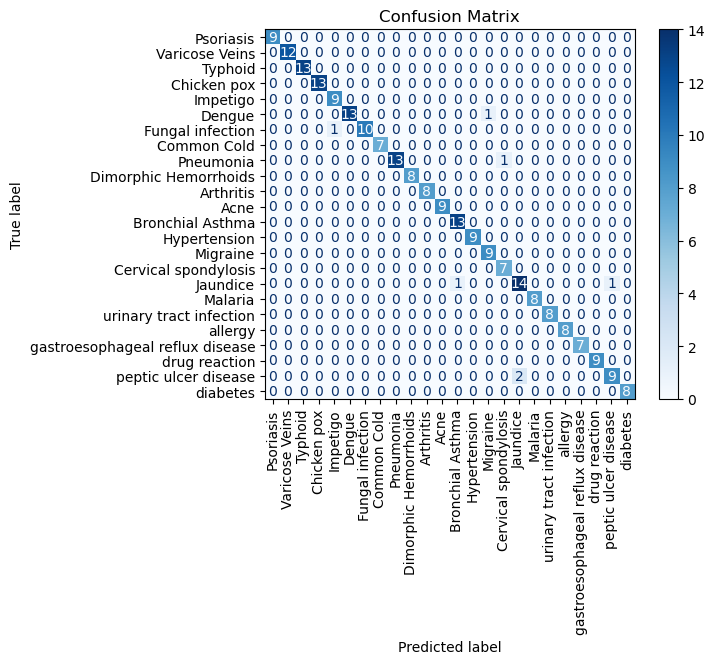

In [36]:
from sklearn.metrics import ConfusionMatrixDisplay,confusion_matrix

# Generate confusion matrix
conf_matrix = confusion_matrix(y_test, rf_predictions)

# Using sklearn's ConfusionMatrixDisplay to plot
ConfusionMatrixDisplay.from_predictions(
    y_test, 
    rf_predictions, 
    display_labels=labels.unique(), 
    cmap='Blues', 
    xticks_rotation=90  # Rotate the x-axis labels if needed
)
plt.title('Confusion Matrix')
plt.show()


In [ ]:
#Evaluate Model
accuracy = accuracy_score(y_test, rf_predictions)
print(f"{rf_model} Accuracy: {accuracy*100}%")
print(f'Accuracy: {accuracy}')
print(classification_report(y_test, rf_predictions))

In [ ]:
# Manual Input
symptom ="Rash, fever, nausea, and difficulty breathing."

# Preprocess the input symptom
preprocessed_symptom = preprocess_text(symptom)

# Transform the preprocessed symptom using the same vectorizer used during training
symptom_tfidf = tfidf_vectorizer.transform([preprocessed_symptom])

# Convert sparse matrix to dense array
symptom_dense = symptom_tfidf.toarray()

# Predict the disease
predicted_disease = rf_model.predict(symptom_dense)

# Output the predicted disease
print(f'Predicted Disease: {predicted_disease}')


In [ ]:
disease_classification_by_specialization = {
    "Dermatologist": ["Psoriasis", "Varicose Veins", "Impetigo", "Fungal Infection", "Acne"],
    "Infectious Disease Specialist": ["Typhoid", "Chicken pox", "Dengue", "Malaria"],
    "Pulmonologist": ["Pneumonia", "Bronchial Asthma"],
    "Gastroenterologist": ["Gastroesophageal Reflux Disease", "Peptic Ulcer Disease", "Jaundice"],
    "Rheumatologist": ["Arthritis", "Cervical Spondylosis"],
    "Neurologist": ["Migraine"],
    "Cardiologist": ["Hypertension"],
    "Endocrinologist": ["Diabetes"],
    "Allergist / Immunologist": ["Allergy", "Drug Reaction"],
    "General Practitioner": ["Common Cold", "Urinary Tract Infection", "Dimorphic Hemorrhoids"]
}


flag = 0# Ensure the predicted disease is in lowercase
for key, val in disease_classification_by_specialization.items():
    for i in val:
        if predicted_disease == i.lower():
            print("Please meet a:", key)
            flag = 1
            break
    if flag:
        break  # Exit outer loop once the match is found

if not flag:
    print("Try again")

            

In [25]:
#Example Input and output
Psoriasis: "Red patches of skin covered with thick, silvery scales, dry and cracked skin, itching, burning, or soreness."

Varicose Veins: "Twisted, bulging veins, aching and heavy legs, swelling in the legs and ankles."

Typhoid: "Prolonged fever (up to 104°F or 39°C), weakness and fatigue, abdominal pain, diarrhea or constipation, headache, and loss of appetite."

Impetigo: "Itchy rash with red spots and blisters, fever, and fatigue."

Chicken Pox: "Red sores on the face, especially around the nose and mouth, itching and soreness, yellow-brown crusted sores that may ooze."

Dengue: "High fever, severe headaches, pain behind the eyes, joint and muscle pain, skin rash, and mild bleeding."

Fungal Infection: "Red, itchy, and scaly skin, blisters or pustules, discolored nails or nail separation."

Common Cold: "Runny or stuffy nose, sore throat and cough, sneezing, and mild headache."

Pneumonia: "Cough with phlegm or pus, fever, chills, and difficulty breathing, chest pain when breathing or coughing."

Dimorphic Hemorrhoids: "Painful swelling around the anus, bleeding during bowel movements, itching, and irritation in the anal region."

Arthritis: "Joint pain and stiffness, swelling and decreased range of motion, redness and warmth around affected joints."

Acne: "Pimples, blackheads, and cysts on the skin, oily skin, scarring and redness."

Bronchial Asthma: "Shortness of breath and wheezing, chest tightness and coughing, symptoms worsen during exercise or at night."

Hypertension: "Headaches, shortness of breath, nosebleeds, and flushing."

Migraine: "Severe headache, sensitivity to light, nausea, and vomiting."

Cervical Spondylosis: "Neck pain and stiffness, headaches, and numbness in arms or hands."

Jaundice: "Yellowing of skin and eyes, dark urine, and fatigue."

Malaria: "Fever, chills, sweats, headaches, nausea, and vomiting."

Urinary Tract Infection: "Frequent urination, burning sensation while urinating, cloudy urine, and pelvic pain."

Allergy: "Itchy skin, hives, swelling, and difficulty breathing."

Gastroesophageal Reflux Disease (GERD): "Heartburn, regurgitation, difficulty swallowing, and chest pain."

Drug Reaction: "Rash, fever, nausea, and difficulty breathing."

Peptic Ulcer Disease: "Burning stomach pain, bloating, and nausea."

Diabetes: "Increased thirst, frequent urination, extreme fatigue, and blurred vision."


SyntaxError: invalid syntax (2040433537.py, line 4)

In [ ]:
Patient: "I have red patches of skin covered with thick, silvery scales. My skin is dry and cracked, and I’ve been feeling itchy and sore."

Disease: Psoriasis

Patient: "I notice that my veins are twisted and bulging. My legs feel heavy and achy, and I often have swelling in my legs and ankles."

Disease: Varicose Veins

Patient: "I've been running a prolonged fever, up to 104°F, and I feel really weak and fatigued. I also have abdominal pain and sometimes diarrhea."

Disease: Typhoid

Patient: "I have this itchy rash with red spots and blisters all over my body. I also have a fever and feel really tired."

Disease: Chicken Pox

Patient: "There are red sores on my face, especially around my nose and mouth. They’re really itchy and sore, and some have yellow-brown crusts."

Disease: Impetigo

Patient: "I've been experiencing a high fever and severe headaches. There's also pain behind my eyes and my joints and muscles ache. Sometimes I have mild bleeding."

Disease: Dengue

Patient: "My skin is red, itchy, and scaly. I’ve developed blisters, and my nails are discolored."

Disease: Fungal Infection

Patient: "I have a runny nose, I keep sneezing, and my throat is sore. I feel mild headaches as well."

Disease: Common Cold

Patient: "I've been coughing up phlegm, and I have a fever with chills. It's hard to breathe sometimes, and I feel pain in my chest when I cough."

Disease: Pneumonia

Patient: "I have painful swelling around my anus, and I notice bleeding during bowel movements. It itches and feels irritated."

Disease: Dimorphic Hemorrhoids

Patient: "I experience joint pain and stiffness, and my joints swell and lose range of motion. They also feel warm and red."

Disease: Arthritis

Patient: "I keep getting pimples, blackheads, and cysts on my skin. My skin feels oily, and I have some scarring."

Disease: Acne

Patient: "I often feel short of breath and wheezy. There's a tightness in my chest, and I cough a lot, especially at night."

Disease: Bronchial Asthma

Patient: "I’ve been having headaches, shortness of breath, and even nosebleeds sometimes."

Disease: Hypertension

Patient: "I get these severe headaches that come with sensitivity to light, nausea, and sometimes I even vomit."

Disease: Migraine

Patient: "My neck hurts and feels stiff, and I've been getting headaches too. Sometimes I feel numbness in my arms and hands."

Disease: Cervical Spondylosis

Patient: "I’ve noticed yellowing of my skin and eyes, my urine is dark, and I feel really fatigued."

Disease: Jaundice

Patient: "I have a fever, chills, and sweats. I also feel nauseous and vomit sometimes."

Disease: Malaria

Patient: "I need to urinate frequently, and it burns when I do. My urine is cloudy, and I feel pain in my pelvic area."

Disease: Urinary Tract Infection

Patient: "I have itchy skin, hives, and sometimes I have trouble breathing."

Disease: Allergy

Patient: "I experience heartburn a lot, and I sometimes have regurgitation and chest pain."

Disease: Gastroesophageal Reflux Disease (GERD)

Patient: "I developed a rash, fever, nausea, and sometimes I have trouble breathing after taking medication."

Disease: Drug Reaction

Patient: "I have burning pain in my stomach, bloating, and I feel nauseous."

Disease: Peptic Ulcer Disease

Patient: "I feel extremely thirsty all the time, and I’m urinating frequently. I also feel fatigued and my vision is blurry."

Disease: Diabetes